# Yellowbrick: Machine Learning Visualization

[Docs](https://www.scikit-yb.org/en/latest/index.html)

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import yellowbrick as yb

In [2]:
from yellowbrick.datasets import load_mushroom
X, y = load_mushroom()
pd.concat([X, y], axis=1)

,shape,surface,color,target
0,convex,smooth,yellow,edible
1,bell,smooth,white,edible
2,convex,scaly,white,poisonous
3,convex,smooth,gray,edible
4,convex,scaly,yellow,edible
...,...,...,...,...
8118,knobbed,smooth,brown,edible
8119,convex,smooth,brown,edible
8120,flat,smooth,brown,edible
8121,knobbed,scaly,brown,poisonous


## Case study:bikeshare

In [3]:
from yellowbrick.datasets import load_bikeshare
X, y = load_bikeshare()
print(X.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       1     0      1     0        0        6           0        1  0.24   
1       1     0      1     1        0        6           0        1  0.22   
2       1     0      1     2        0        6           0        1  0.22   
3       1     0      1     3        0        6           0        1  0.24   
4       1     0      1     4        0        6           0        1  0.24   

   feelslike  humidity  windspeed  
0     0.2879      0.81        0.0  
1     0.2727      0.80        0.0  
2     0.2727      0.80        0.0  
3     0.2879      0.75        0.0  
4     0.2879      0.75        0.0  


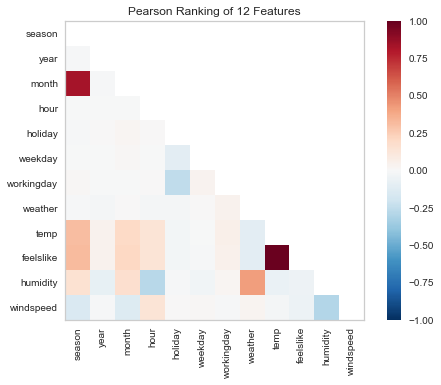

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [4]:
from  yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm = "pearson")
visualizer.fit_transform(X)
visualizer.show()
# plt.tight_layout()

In this chart, we see that the features temp and feelslike have a strong correlation and also that the feature season has a strong correlation with the feature month. This seems to make sense; the apparent temperature we feel outside depends on the actual temperature and other airquality factors, and the season of the year is described by the month! To dive in deeper, we can use the Direct Data Visualization (JointPlotVisualizer) to inspect those relationships.

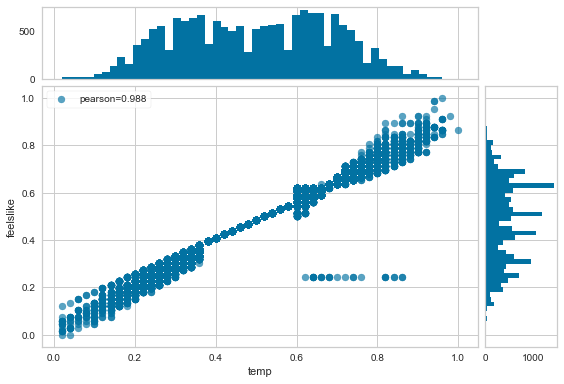

<AxesSubplot:xlabel='temp', ylabel='feelslike'>

In [5]:
from yellowbrick.features import JointPlotVisualizer
visualizer = JointPlotVisualizer(columns = ['temp', 'feelslike'])
# plt.figure(figsize=(16,10), dpi = 100)
visualizer.fit_transform(X, y) 
visualizer.show()

Train the model,fit a linear regression to it and plot the residuals.

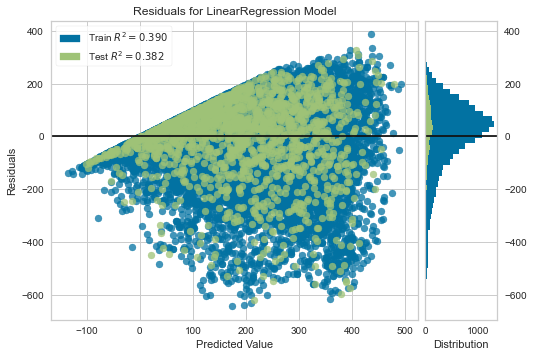

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [6]:
from yellowbrick.datasets import load_bikeshare
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X, y = load_bikeshare()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

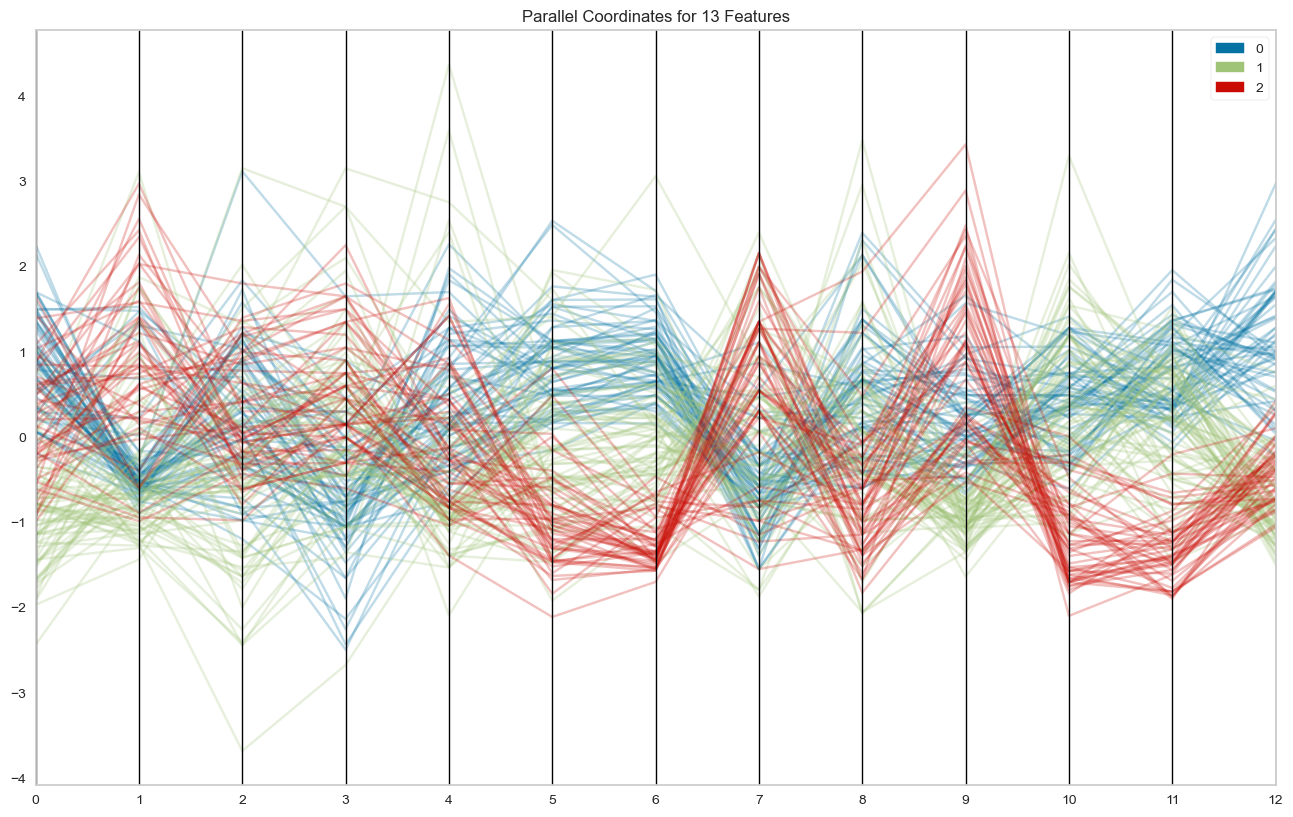

In [7]:
from sklearn.datasets import load_wine
from yellowbrick.features import parallel_coordinates

plt.figure(figsize=(16,10), dpi = 100)
X, y = load_wine(return_X_y=True)
visualizer = parallel_coordinates(X, y, normalize="standard")